In [ ]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [ ]:

import pandas as pd

In [ ]:
file_path = "Fuel_cell_performance_data-Full.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)
demo_data=data

# Display the first few rows of the dataset
print("Dataset loaded successfully!")


Dataset loaded successfully!


Training set size: 700 rows
Test set size: 300 rows


In [60]:
from pycaret.regression import *

# Assuming 'data' is your dataset and 'Target1' is the target variable
s = setup(data=data, target='Target1', train_size=0.7)

,Description,Value
0,Session id,234
1,Target,Target1
2,Target type,Regression
3,Original data shape,"(1000, 16)"
4,Transformed data shape,"(1000, 16)"
5,Transformed train set shape,"(700, 16)"
6,Transformed test set shape,"(300, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [66]:

cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.0498,0.0035,0.0593,0.2235,0.0323,0.0600,0.0220
lr,Linear Regression,0.0498,0.0035,0.0593,0.2232,0.0323,0.0600,0.0250
lar,Least Angle Regression,0.0498,0.0035,0.0593,0.2231,0.0323,0.0600,0.0240
br,Bayesian Ridge,0.0499,0.0035,0.0594,0.2202,0.0324,0.0602,0.0280
ada,AdaBoost Regressor,0.0500,0.0036,0.0597,0.2146,0.0325,0.0603,0.2380
et,Extra Trees Regressor,0.0504,0.0037,0.0606,0.1891,0.0330,0.0609,0.3320
rf,Random Forest Regressor,0.0507,0.0037,0.0607,0.1865,0.0331,0.0611,0.7940
gbr,Gradient Boosting Regressor,0.0518,0.0038,0.0618,0.1571,0.0337,0.0624,0.4760
lightgbm,Light Gradient Boosting Machine,0.0516,0.0039,0.0623,0.1410,0.0339,0.0622,0.2380
lasso,Lasso Regression,0.0528,0.0040,0.0632,0.1212,0.0345,0.0638,0.0240


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

**Normalization**

In [23]:
from pycaret.regression import *
# Setup for your dataset with preprocessing options
setup(data = demo_data, target = 'Target1',
      normalize = True, normalize_method = 'minmax', data_split_shuffle = False, verbose=False)
cm = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0500,0.0035,0.0591,0.1601,0.0322,0.0604,0.0320
ridge,Ridge Regression,0.0500,0.0035,0.0591,0.1578,0.0323,0.0604,0.0300
lr,Linear Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0350
lar,Least Angle Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0290
huber,Huber Regressor,0.0502,0.0036,0.0595,0.1467,0.0325,0.0608,0.0410
par,Passive Aggressive Regressor,0.0503,0.0036,0.0600,0.1346,0.0328,0.0614,0.0290
ada,AdaBoost Regressor,0.0513,0.0037,0.0607,0.1135,0.0331,0.0619,0.1810
et,Extra Trees Regressor,0.0518,0.0037,0.0609,0.1068,0.0332,0.0625,0.3460
rf,Random Forest Regressor,0.0516,0.0038,0.0612,0.0990,0.0334,0.0624,0.9270
gbr,Gradient Boosting Regressor,0.0521,0.0039,0.0620,0.0735,0.0338,0.0629,0.6100


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [24]:
from pycaret.regression import *
# Setup for your dataset with preprocessing options
setup(data = demo_data, target = 'Target1',
      normalize = True, normalize_method = 'zscore', data_split_shuffle = False, verbose=False)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0500,0.0035,0.0591,0.1595,0.0322,0.0605,0.0440
ridge,Ridge Regression,0.0500,0.0035,0.0591,0.1565,0.0323,0.0605,0.0850
lr,Linear Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0920
lar,Least Angle Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0630
huber,Huber Regressor,0.0502,0.0036,0.0595,0.1467,0.0325,0.0608,0.0360
par,Passive Aggressive Regressor,0.0503,0.0036,0.0596,0.1435,0.0325,0.0609,0.0340
ada,AdaBoost Regressor,0.0511,0.0037,0.0605,0.1207,0.0330,0.0617,0.1800
et,Extra Trees Regressor,0.0518,0.0037,0.0608,0.1113,0.0332,0.0626,0.3490
rf,Random Forest Regressor,0.0517,0.0038,0.0614,0.0928,0.0335,0.0625,0.9510
gbr,Gradient Boosting Regressor,0.0521,0.0039,0.0621,0.0717,0.0339,0.0629,0.4640


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [20]:
from pycaret.regression import *
# Setup for your dataset with preprocessing options
setup(data = demo_data, target = 'Target1',
      normalize = True, normalize_method = 'minmax', data_split_shuffle = False, verbose=False)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0500,0.0035,0.0591,0.1601,0.0322,0.0604,0.0280
ridge,Ridge Regression,0.0500,0.0035,0.0591,0.1578,0.0323,0.0604,0.0280
lr,Linear Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0280
lar,Least Angle Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0320
huber,Huber Regressor,0.0502,0.0036,0.0595,0.1467,0.0325,0.0608,0.0400
ada,AdaBoost Regressor,0.0508,0.0036,0.0601,0.1287,0.0328,0.0613,0.3190
et,Extra Trees Regressor,0.0511,0.0037,0.0603,0.1256,0.0329,0.0617,0.4540
par,Passive Aggressive Regressor,0.0513,0.0037,0.0610,0.0978,0.0332,0.0613,0.0340
rf,Random Forest Regressor,0.0516,0.0038,0.0613,0.0963,0.0334,0.0623,0.9850
gbr,Gradient Boosting Regressor,0.0521,0.0039,0.0620,0.0748,0.0338,0.0628,0.3580


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [21]:
from pycaret.regression import *
# Setup for your dataset with preprocessing options
setup(data = demo_data, target = 'Target1',
      normalize = True, normalize_method = 'robust', data_split_shuffle = False, verbose=False)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0500,0.0035,0.0591,0.1592,0.0323,0.0605,0.0320
ridge,Ridge Regression,0.0500,0.0035,0.0591,0.1567,0.0323,0.0605,0.0530
lr,Linear Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0520
lar,Least Angle Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0380
huber,Huber Regressor,0.0502,0.0036,0.0595,0.1467,0.0325,0.0608,0.0390
ada,AdaBoost Regressor,0.0512,0.0037,0.0604,0.1212,0.0329,0.0617,0.1750
par,Passive Aggressive Regressor,0.0511,0.0037,0.0607,0.1103,0.0331,0.0619,0.0290
rf,Random Forest Regressor,0.0515,0.0037,0.0608,0.1089,0.0332,0.0622,0.9160
et,Extra Trees Regressor,0.0518,0.0037,0.0611,0.1031,0.0333,0.0626,0.3420
gbr,Gradient Boosting Regressor,0.0521,0.0039,0.0620,0.0760,0.0338,0.0628,0.3090


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

**Feature Selection**

In [48]:
setup_result = setup(
    data=demo_data,
    target='Target1', # Replace 'Target1' with the exact name of your target column if different

    feature_selection=True,
    feature_selection_method='classic',
    n_features_to_select=0.9,  # Adjust proportion of features to keep (e.g., 20%)
    data_split_shuffle=False,  # Set to True if you want randomized splitting
    verbose=False  # Suppress detailed output
)

cm = compare_models()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3030
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 15
[LightGBM] [Info] Start training from score 0.839391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.0498,0.0035,0.0588,0.1664,0.0321,0.0603,0.1090
lr,Linear Regression,0.0499,0.0035,0.0588,0.1659,0.0321,0.0603,0.6680
lar,Least Angle Regression,0.0499,0.0035,0.0589,0.1647,0.0321,0.0603,0.1090
br,Bayesian Ridge,0.0501,0.0035,0.0590,0.1621,0.0322,0.0606,0.1090
ada,AdaBoost Regressor,0.0510,0.0036,0.0601,0.1310,0.0328,0.0616,0.2490
et,Extra Trees Regressor,0.0517,0.0037,0.0610,0.1041,0.0333,0.0625,0.6380
rf,Random Forest Regressor,0.0517,0.0037,0.0611,0.1026,0.0333,0.0624,0.7100
lasso,Lasso Regression,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.1960
omp,Orthogonal Matching Pursuit,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.1070
llar,Lasso Least Angle Regression,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.1110


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [49]:
setup_result = setup(
    data=demo_data,
    target='Target1',  # Replace 'Target1' with the exact name of your target column if different

    feature_selection=True,
    feature_selection_method='univariate',
    n_features_to_select=0.2,  # Adjust proportion of features to keep (e.g., 20%)
    data_split_shuffle=False,  # Set to True if you want randomized splitting
    verbose=False  # Suppress detailed output
)

cm = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0502,0.0035,0.0590,0.1619,0.0322,0.0607,0.0300
ridge,Ridge Regression,0.0502,0.0035,0.0590,0.1618,0.0322,0.0607,0.0550
lar,Least Angle Regression,0.0502,0.0035,0.0590,0.1618,0.0322,0.0607,0.0470
lr,Linear Regression,0.0502,0.0035,0.0590,0.1618,0.0322,0.0607,0.0290
huber,Huber Regressor,0.0501,0.0035,0.0591,0.1602,0.0323,0.0607,0.0490
ada,AdaBoost Regressor,0.0509,0.0036,0.0602,0.1294,0.0328,0.0614,0.0860
en,Elastic Net,0.0524,0.0039,0.0622,0.0714,0.0340,0.0634,0.0520
llar,Lasso Least Angle Regression,0.0524,0.0039,0.0622,0.0714,0.0340,0.0634,0.0520
lasso,Lasso Regression,0.0524,0.0039,0.0622,0.0714,0.0340,0.0634,0.0480
omp,Orthogonal Matching Pursuit,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.0550


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [50]:
setup_result = setup(
    data=demo_data,
    target='Target1',  # Replace 'Target1' with the exact name of your target column if different
    feature_selection=True,
    feature_selection_method='sequential',
    n_features_to_select=0.2,  # Adjust proportion of features to keep (e.g., 20%)
    data_split_shuffle=False,  # Set to True if you want randomized splitting
    verbose=False  # Suppress detailed output
)

cm = compare_models()


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# ** Model performance using "Transformation"**

In [51]:
setup(data = demo_data, target = 'Target1',
      transformation = True, transformation_method = 'yeo-johnson',
      data_split_shuffle = False, verbose=False)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0500,0.0035,0.0592,0.1578,0.0323,0.0605,0.1010
ridge,Ridge Regression,0.0500,0.0035,0.0591,0.1574,0.0323,0.0604,0.0690
lr,Linear Regression,0.0500,0.0035,0.0591,0.1567,0.0323,0.0604,0.0720
lar,Least Angle Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0604,0.0720
ada,AdaBoost Regressor,0.0510,0.0036,0.0601,0.1283,0.0328,0.0616,0.2140
et,Extra Trees Regressor,0.0517,0.0037,0.0610,0.1045,0.0333,0.0624,0.6210
rf,Random Forest Regressor,0.0515,0.0037,0.0611,0.1019,0.0333,0.0622,0.7250
gbr,Gradient Boosting Regressor,0.0522,0.0039,0.0621,0.0716,0.0338,0.0629,0.3440
en,Elastic Net,0.0524,0.0039,0.0624,0.0670,0.0341,0.0634,0.0680
lasso,Lasso Regression,0.0524,0.0039,0.0624,0.0662,0.0341,0.0634,0.0690


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

**Model performance using "PCA"**

In [53]:
setup(data = demo_data, target = 'Target1',
      pca = True, pca_method = 'linear', data_split_shuffle = False, verbose=False)
cm = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0501,0.0035,0.0591,0.1579,0.0323,0.0606,0.0310
ridge,Ridge Regression,0.0500,0.0035,0.0591,0.1570,0.0323,0.0605,0.0290
lr,Linear Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0310
lar,Least Angle Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0390
ada,AdaBoost Regressor,0.0508,0.0036,0.0602,0.1253,0.0328,0.0613,0.1860
rf,Random Forest Regressor,0.0516,0.0038,0.0611,0.1022,0.0333,0.0623,0.9760
et,Extra Trees Regressor,0.0518,0.0038,0.0612,0.1006,0.0334,0.0626,0.3390
lasso,Lasso Regression,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.0330
omp,Orthogonal Matching Pursuit,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.0300
llar,Lasso Least Angle Regression,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.0430


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [55]:
setup(data = demo_data, target = 'Target1',
      pca = True, pca_method = 'incremental', data_split_shuffle = False, verbose=False)

cm = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0501,0.0035,0.0591,0.1579,0.0323,0.0606,0.0380
ridge,Ridge Regression,0.0500,0.0035,0.0591,0.1570,0.0323,0.0605,0.0610
lr,Linear Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.4900
lar,Least Angle Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0640
ada,AdaBoost Regressor,0.0513,0.0037,0.0607,0.1137,0.0331,0.0619,0.1810
et,Extra Trees Regressor,0.0515,0.0037,0.0609,0.1081,0.0332,0.0622,0.6020
rf,Random Forest Regressor,0.0519,0.0038,0.0615,0.0926,0.0335,0.0627,0.8710
lasso,Lasso Regression,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.0590
omp,Orthogonal Matching Pursuit,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.0320
llar,Lasso Least Angle Regression,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.0340


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

**"Each model one by one"**

In [65]:

setup(data=demo_data, target='Target1', train_size=0.7, verbose=False)

# List of all regression models
models = [
    'et', 'rf', 'lightgbm', 'gbr', 'xgboost', 'huber', 'br', 'dt',
    'ridge', 'lar', 'lr', 'en', 'ada', 'knn', 'lasso', 'llar', 'par', 'omp', 'dummy'
]

# Dictionary to store results
results = {}

# Loop through each model
for model in models:
    print(f"Training model: {model}")
    trained_model = create_model(model)  # Train the model
    metrics = pull()  # Retrieve metrics from the latest run
    results[model] = metrics['R2'].mean()  # Store the mean R²

# Find the best model based on R²
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with R2 = {results[best_model_name]}")


Training model: et


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0488,0.0038,0.0614,0.0683,0.0335,0.0585
1,0.0503,0.0035,0.0591,0.1909,0.0324,0.0613
2,0.0464,0.0031,0.0557,0.1823,0.0302,0.0553
3,0.0514,0.0037,0.0610,0.2640,0.0335,0.0627
4,0.0491,0.0036,0.0600,0.2773,0.0328,0.0593
5,0.0525,0.0038,0.0614,0.2074,0.0332,0.0623
6,0.0504,0.0037,0.0612,0.1214,0.0334,0.0608
7,0.0542,0.0040,0.0629,0.2167,0.0345,0.0666
8,0.0480,0.0032,0.0570,0.2737,0.0311,0.0585


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: rf


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0505,0.0039,0.0625,0.0354,0.0341,0.0605
1,0.0488,0.0033,0.0572,0.2420,0.0314,0.0597
2,0.0472,0.0032,0.0565,0.1605,0.0306,0.0563
3,0.0516,0.0038,0.0618,0.2454,0.0338,0.0629
4,0.0507,0.0037,0.0611,0.2518,0.0334,0.0615
5,0.0513,0.0037,0.0609,0.2213,0.0329,0.0611
6,0.0498,0.0036,0.0597,0.1642,0.0326,0.0598
7,0.0539,0.0038,0.0617,0.2461,0.0338,0.0660
8,0.0490,0.0034,0.0582,0.2411,0.0318,0.0595


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: lightgbm


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0513,0.0044,0.0665,-0.0904,0.0362,0.0616
1,0.0510,0.0036,0.0599,0.1695,0.0327,0.0617
2,0.0459,0.0031,0.0560,0.1759,0.0303,0.0546
3,0.0521,0.0037,0.0611,0.2620,0.0335,0.0635
4,0.0488,0.0036,0.0597,0.2860,0.0327,0.0591
5,0.0531,0.0038,0.0616,0.2012,0.0334,0.0631
6,0.0506,0.0040,0.0630,0.0689,0.0344,0.0612
7,0.0551,0.0040,0.0634,0.2022,0.0347,0.0672
8,0.0507,0.0038,0.0614,0.1576,0.0335,0.0618


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: gbr


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0516,0.0041,0.0638,-0.0054,0.0348,0.0617
1,0.0477,0.0032,0.0569,0.2501,0.0312,0.0584
2,0.0470,0.0030,0.0552,0.1982,0.0300,0.0562
3,0.0526,0.0039,0.0628,0.2200,0.0343,0.0638
4,0.0498,0.0036,0.0597,0.2850,0.0326,0.0601
5,0.0557,0.0041,0.0643,0.1302,0.0348,0.0662
6,0.0522,0.0039,0.0622,0.0917,0.0340,0.0627
7,0.0546,0.0039,0.0623,0.2302,0.0341,0.0668
8,0.0537,0.0042,0.0650,0.0540,0.0355,0.0654


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: xgboost


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0564,0.0048,0.0695,-0.1921,0.0379,0.0677
1,0.0543,0.0041,0.0637,0.0598,0.0349,0.0665
2,0.0500,0.0037,0.0610,0.0212,0.0331,0.0598
3,0.0520,0.0038,0.0615,0.2522,0.0337,0.0635
4,0.0534,0.0043,0.0653,0.1451,0.0357,0.0646
5,0.0560,0.0043,0.0655,0.0986,0.0355,0.0669
6,0.0507,0.0039,0.0624,0.0852,0.0342,0.0615
7,0.0556,0.0042,0.0647,0.1704,0.0352,0.0674
8,0.0576,0.0047,0.0685,-0.0496,0.0373,0.0700


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: huber


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0584,0.0056,0.0748,-0.3802,0.0407,0.0690
1,0.0683,0.0075,0.0868,-0.7422,0.0470,0.0830
2,0.1369,0.0294,0.1715,-6.7407,0.0968,0.1613
3,0.1159,0.0199,0.1409,-2.9219,0.0764,0.1391
4,0.1343,0.0276,0.1663,-4.5465,0.0907,0.1588
5,0.1394,0.0287,0.1695,-5.0386,0.0937,0.1670
6,0.1738,0.0489,0.2211,-10.4753,0.1185,0.2062
7,0.1254,0.0227,0.1506,-3.4966,0.0825,0.1527
8,0.0596,0.0058,0.0762,-0.3005,0.0413,0.0732


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: br


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0502,0.0038,0.0612,0.0741,0.0333,0.0600
1,0.0474,0.0032,0.0568,0.2545,0.0311,0.0579
2,0.0456,0.0029,0.0539,0.2354,0.0292,0.0542
3,0.0507,0.0037,0.0610,0.2647,0.0334,0.0618
4,0.0496,0.0035,0.0595,0.2893,0.0325,0.0601
5,0.0511,0.0036,0.0602,0.2378,0.0326,0.0606
6,0.0490,0.0034,0.0584,0.1988,0.0319,0.0592
7,0.0530,0.0036,0.0604,0.2768,0.0331,0.0650
8,0.0491,0.0033,0.0574,0.2636,0.0313,0.0597


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: dt


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0696,0.0072,0.0847,-0.7723,0.0464,0.0830
1,0.0681,0.0070,0.0836,-0.6164,0.0456,0.0838
2,0.0649,0.0065,0.0806,-0.7098,0.0438,0.0786
3,0.0710,0.0085,0.0924,-0.6856,0.0503,0.0881
4,0.0703,0.0080,0.0892,-0.5970,0.0491,0.0863
5,0.0742,0.0081,0.0899,-0.6982,0.0490,0.0896
6,0.0741,0.0079,0.0887,-0.8469,0.0487,0.0887
7,0.0699,0.0074,0.0861,-0.4687,0.0469,0.0841
8,0.0652,0.0061,0.0782,-0.3664,0.0425,0.0776


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: ridge


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0489,0.0037,0.0604,0.0981,0.0329,0.0584
1,0.0465,0.0031,0.0555,0.2876,0.0304,0.0569
2,0.0462,0.0030,0.0552,0.1981,0.0299,0.0551
3,0.0512,0.0037,0.0610,0.2661,0.0334,0.0623
4,0.0514,0.0037,0.0611,0.2501,0.0334,0.0623
5,0.0514,0.0037,0.0607,0.2256,0.0328,0.0611
6,0.0496,0.0035,0.0595,0.1695,0.0325,0.0598
7,0.0505,0.0034,0.0582,0.3287,0.0319,0.0618
8,0.0484,0.0032,0.0567,0.2812,0.0310,0.0589


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: lar


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0488,0.0037,0.0604,0.0986,0.0329,0.0584
1,0.0465,0.0031,0.0554,0.2890,0.0304,0.0568
2,0.0463,0.0031,0.0553,0.1955,0.0300,0.0553
3,0.0512,0.0037,0.0610,0.2660,0.0334,0.0623
4,0.0514,0.0037,0.0612,0.2481,0.0334,0.0623
5,0.0514,0.0037,0.0607,0.2261,0.0328,0.0610
6,0.0497,0.0035,0.0595,0.1678,0.0325,0.0599
7,0.0504,0.0034,0.0582,0.3297,0.0319,0.0617
8,0.0484,0.0032,0.0567,0.2804,0.0310,0.0589


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: lr


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0488,0.0037,0.0604,0.0986,0.0329,0.0584
1,0.0465,0.0031,0.0554,0.2890,0.0304,0.0568
2,0.0463,0.0031,0.0553,0.1955,0.0300,0.0553
3,0.0512,0.0037,0.0610,0.2660,0.0334,0.0623
4,0.0514,0.0037,0.0612,0.2481,0.0334,0.0623
5,0.0514,0.0037,0.0607,0.2261,0.0328,0.0610
6,0.0497,0.0035,0.0595,0.1678,0.0325,0.0599
7,0.0504,0.0034,0.0582,0.3297,0.0319,0.0617
8,0.0484,0.0032,0.0567,0.2804,0.0310,0.0589


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: en


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0525,0.0040,0.0633,0.0123,0.0344,0.0625
1,0.0476,0.0033,0.0576,0.2318,0.0316,0.0582
2,0.0483,0.0034,0.0581,0.1125,0.0316,0.0580
3,0.0551,0.0046,0.0679,0.0893,0.0373,0.0678
4,0.0544,0.0043,0.0657,0.1339,0.0360,0.0661
5,0.0532,0.0039,0.0624,0.1809,0.0338,0.0631
6,0.0498,0.0037,0.0610,0.1275,0.0333,0.0600
7,0.0584,0.0044,0.0664,0.1265,0.0363,0.0713
8,0.0518,0.0036,0.0602,0.1889,0.0329,0.0630


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: ada


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0491,0.0037,0.0606,0.0950,0.0330,0.0587
1,0.0478,0.0032,0.0568,0.2524,0.0311,0.0584
2,0.0448,0.0029,0.0541,0.2308,0.0293,0.0535
3,0.0519,0.0038,0.0620,0.2417,0.0339,0.0628
4,0.0511,0.0039,0.0622,0.2246,0.0340,0.0620
5,0.0517,0.0037,0.0606,0.2274,0.0328,0.0614
6,0.0481,0.0032,0.0567,0.2465,0.0309,0.0578
7,0.0528,0.0036,0.0596,0.2964,0.0326,0.0644
8,0.0494,0.0035,0.0591,0.2200,0.0323,0.0603


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: knn


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0604,0.0052,0.0724,-0.2950,0.0393,0.0714
1,0.0530,0.0045,0.0667,-0.0300,0.0365,0.0648
2,0.0541,0.0044,0.0661,-0.1515,0.0360,0.0649
3,0.0577,0.0047,0.0682,0.0803,0.0374,0.0707
4,0.0615,0.0052,0.0720,-0.0401,0.0393,0.0736
5,0.0548,0.0043,0.0656,0.0957,0.0355,0.0647
6,0.0526,0.0039,0.0628,0.0735,0.0343,0.0634
7,0.0550,0.0047,0.0684,0.0723,0.0374,0.0672
8,0.0597,0.0051,0.0717,-0.1500,0.0392,0.0724


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: lasso


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0525,0.0040,0.0632,0.0131,0.0343,0.0625
1,0.0477,0.0033,0.0576,0.2310,0.0316,0.0582
2,0.0483,0.0034,0.0581,0.1129,0.0316,0.0580
3,0.0550,0.0046,0.0678,0.0918,0.0372,0.0677
4,0.0544,0.0043,0.0657,0.1338,0.0360,0.0661
5,0.0532,0.0039,0.0624,0.1805,0.0338,0.0632
6,0.0498,0.0037,0.0610,0.1276,0.0333,0.0600
7,0.0584,0.0044,0.0664,0.1263,0.0363,0.0713
8,0.0518,0.0036,0.0602,0.1884,0.0329,0.0630


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: llar


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0525,0.0040,0.0632,0.0131,0.0343,0.0625
1,0.0477,0.0033,0.0576,0.2310,0.0316,0.0582
2,0.0483,0.0034,0.0581,0.1129,0.0316,0.0580
3,0.0550,0.0046,0.0678,0.0918,0.0372,0.0677
4,0.0544,0.0043,0.0657,0.1338,0.0360,0.0661
5,0.0532,0.0039,0.0624,0.1805,0.0338,0.0632
6,0.0498,0.0037,0.0610,0.1276,0.0333,0.0600
7,0.0584,0.0044,0.0664,0.1263,0.0363,0.0713
8,0.0518,0.0036,0.0602,0.1884,0.0329,0.0630


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: par


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0821,0.0104,0.1022,-1.5756,0.0560,0.0971
1,0.1196,0.0209,0.1446,-3.8385,0.0769,0.1483
2,0.0658,0.0069,0.0829,-0.8096,0.0453,0.0793
3,0.1171,0.0200,0.1414,-2.9487,0.0756,0.1444
4,0.0851,0.0109,0.1043,-1.1817,0.0566,0.1024
5,0.0812,0.0099,0.0994,-1.0773,0.0537,0.0974
6,0.1228,0.0222,0.1491,-4.2182,0.0850,0.1441
7,0.1386,0.0284,0.1687,-4.6367,0.0970,0.1630
8,0.0830,0.0096,0.0979,-1.1452,0.0532,0.1008


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: omp


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0525,0.0040,0.0633,0.0115,0.0344,0.0625
1,0.0476,0.0033,0.0576,0.2326,0.0316,0.0581
2,0.0483,0.0034,0.0581,0.1121,0.0317,0.0580
3,0.0550,0.0046,0.0678,0.0914,0.0372,0.0677
4,0.0544,0.0043,0.0657,0.1340,0.0360,0.0661
5,0.0532,0.0039,0.0624,0.1813,0.0338,0.0631
6,0.0498,0.0037,0.0610,0.1274,0.0333,0.0600
7,0.0584,0.0044,0.0664,0.1268,0.0363,0.0713
8,0.0517,0.0036,0.0602,0.1894,0.0329,0.0630


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training model: dummy


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0531,0.0041,0.0640,-0.0119,0.0348,0.0634
1,0.0527,0.0043,0.0660,-0.0067,0.0362,0.0646
2,0.0496,0.0038,0.0616,-0.0001,0.0336,0.0597
3,0.0571,0.0051,0.0714,-0.0063,0.0392,0.0705
4,0.0578,0.0050,0.0706,-0.0007,0.0386,0.0702
5,0.0573,0.0048,0.0690,-0.0000,0.0374,0.0685
6,0.0508,0.0043,0.0653,-0.0010,0.0357,0.0615
7,0.0614,0.0051,0.0714,-0.0095,0.0391,0.0751
8,0.0570,0.0045,0.0670,-0.0030,0.0366,0.0692


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Best Model: ridge with R2 = 0.21070833333333336


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0489,0.0037,0.0604,0.0981,0.0329,0.0584
1,0.0465,0.0031,0.0555,0.2876,0.0304,0.0569
2,0.0462,0.0030,0.0552,0.1981,0.0299,0.0551
3,0.0512,0.0037,0.0610,0.2661,0.0334,0.0623
4,0.0514,0.0037,0.0611,0.2501,0.0334,0.0623
5,0.0514,0.0037,0.0607,0.2256,0.0328,0.0611
6,0.0496,0.0035,0.0595,0.1695,0.0325,0.0598
7,0.0505,0.0034,0.0582,0.3287,0.0319,0.0618
8,0.0484,0.0032,0.0567,0.2812,0.0310,0.0589


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

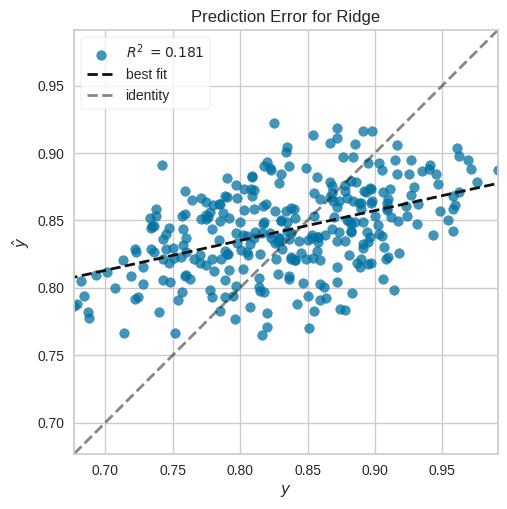

In [68]:
ridge = create_model('ridge')
plot_model(ridge, plot='error')

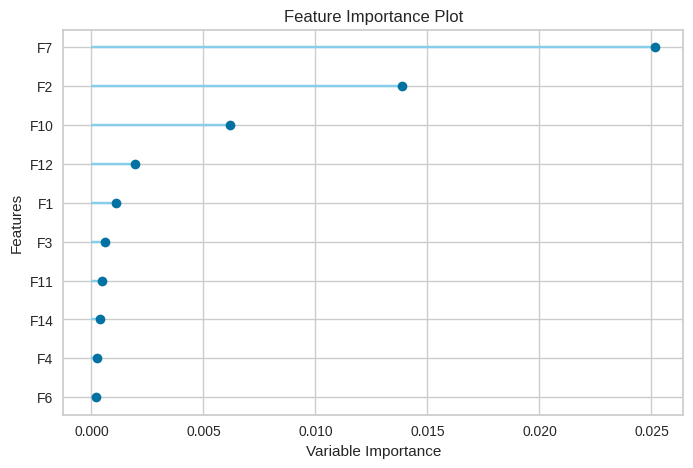

In [72]:
plot_model(ridge, plot='feature')

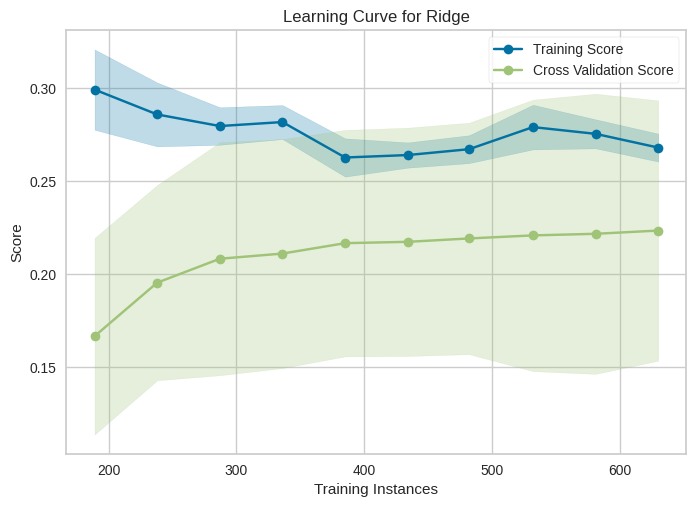

In [69]:
plot_model(ridge, plot='learning')

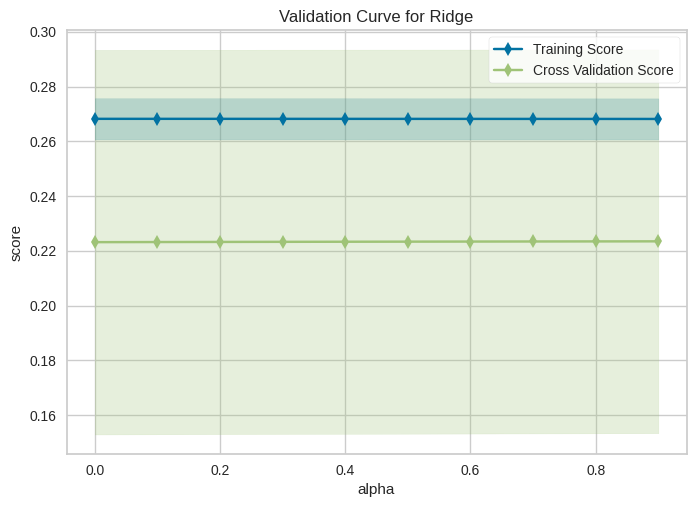

In [70]:
plot_model(ridge, plot='vc')

In [71]:
plot_model(ridge, plot='parameter')

,Parameters
alpha,1.0
copy_X,True
fit_intercept,True
max_iter,None
positive,False
random_state,640
solver,auto
tol,0.0001
